In [17]:
from py5canvas import *

# NumPy
NumPy is a highly optimized numerical computation library that enables operating on collections of numbers at the same time. It is used also by Py5canvas to provide efficient implementation of random number generation, vectors, images and much more.

The standard way to import NumPy is as follows:


In [29]:
import numpy as np

The core of the NumPy library is the `np.array` data structure, that allows storing collections of numbers (1D arrays, 2D arrays, etc.) and perform mathematical operations on them very efficiently. Technically the `np.array` behaves similarly to a Python `list`, but
it is definitely a `list` on steroids and specifically taylored to operate on numbers. You can create a NumPy array by using the `np.array()` function, passing a Python list (or tuple) as an argument. For example:


In [30]:
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

Or you can use NumPy functions to create arrays directly. For example, the `np.linspace()` function creates an array of evenly spaced numbers over a specified interval:

In [31]:
y = np.linspace(0, 10, 5)
y

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

Differently from a Python list, NumPy arrays support element-wise operations. For example, if you have two NumPy arrays of the same size, you can add or subtract them directly:


In [32]:
print(x + y)
#print(y * 10)

[ 1.   4.5  8.  11.5 15. ]


Similarly to lists, you can access individual elements of a NumPy array using indexing. For example, `x[0]` will give you the first element of the array `x`.

In [33]:
x[0]

1

Or query the size of an array using the `len()` function:

In [11]:
len(x)

5

or with the `size` attribute:



In [12]:
x.size

5

What we just created is a 1D array (a vector). NumPy also supports multi-dimensional arrays, for example a 2D array (a matrix) of zeros can be created as follows:

In [13]:
v = np.zeros((3, 4, 2)) # 3 rows, 4 columns
v

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

You can query the shape of a multi-dimensional array using the `shape` attribute:

In [14]:
y.shape

(5,)

We can still loop over the elements of an array with the usual `for` loop syntax, so for example:



In [15]:
for value in x:
    print(value)

1
2
3
4
5


The for loop will always iterate over the first dimension of the array. In this case, since `x` is a 1D array, it will iterate over all its elements. For a 2D array, it will iterate over the rows.

In [34]:
for row in v:
    print(row)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


If you get more confident with NumPy, you will eventually use loops less and less, leading to much more efficient code. The process of converting loops into &ldquo;group operations&rdquo; on arrays is commonly referred to as [&ldquo;vectorization&rdquo;](https://www.programiz.com/python-programming/numpy/vectorization). It can be tricky to master, but is eventually needed if you wish to work at a lower level on topics such as machine learning.



## Use case: `linspace` as opposed to `range` + `remap`

In the code examples we have seen this type of pattern quite often: 

- We create a `for` loop with `range` 
    - e.g. `for i in range(100):`
- Inside the loop, we use `remap` to convert the loop variable to a desired range
    - e.g. `x = remap(i, 0, 100, 0, width)

Since numpy arrays are sequences that can be iterated, we can use `linspace` to write this in a more concise manner, e.g.:

`for x in np.linspace(0, width, 100):`

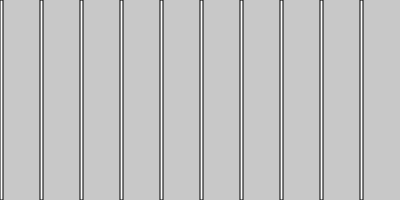

In [ ]:
create_canvas(400, 200)
n = 10
for x in np.linspace(0, width, n, endpoint=False):
    rect(x, 0, 3, height)
# Identically to;
# for i in range(n):
#     x = remap(i, 0, n, 0, width)
#     rect(x, 0, 3, height)
show()

In the example above, we added the optional and named function argument `endpoint`, which is `False` by default. When it is `True` `linspace` gives us a sequence that skips the last value we specified. This will result in a sequence of `x`'s identical to the case where we write `x = remap(i, 0, n, 0, width)`

#### Using arrays with Py5Canvas and `polyline`



Internally to Py5canvas, mathematical functions such as `sin` and `cos` are simply exposing the NumPy counterparts `np.sin` and `np.cos`. This means that these functions can operate also on arrays as opposed to only single numbers. This means we can create a circle without needing to use loops at all.

Let&rsquo;s generate the x and y coordinates of an approximation to a circle by using `np.linspace` to generate a sequence of numbers between `0` and `np.pi*2` (or equivalently `PI*2`):



In [36]:
radius = 100
t = np.linspace(0, np.pi*2, 30)
x = np.cos(t)*radius
y = np.sin(t)*radius
t

array([0.        , 0.21666156, 0.43332312, 0.64998469, 0.86664625,
       1.08330781, 1.29996937, 1.51663094, 1.7332925 , 1.94995406,
       2.16661562, 2.38327719, 2.59993875, 2.81660031, 3.03326187,
       3.24992343, 3.466585  , 3.68324656, 3.89990812, 4.11656968,
       4.33323125, 4.54989281, 4.76655437, 4.98321593, 5.1998775 ,
       5.41653906, 5.63320062, 5.84986218, 6.06652374, 6.28318531])

To visualize the circle we can use a new function `polyline`, which accepts a list of x coordinates and a list of y coordiantes as an input:



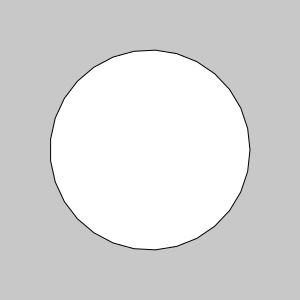

In [37]:
create_canvas(300, 300)
translate(center)
polyline(x, y, close=True)
show()

> **NOTE**: here we use a &ldquo;named&rdquo; function argument. Python allows you to specify arguments with their name followed by an equal sign and the desired value. This can improve legibility, or it may be necessary as in this case, since the `polyline` function accepts different combinations of initial arguments.We can use the `curve` function to connect the points with a smooth curve:



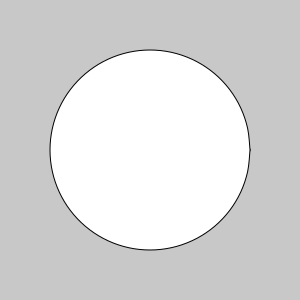

In [38]:
create_canvas(300, 300)
translate(center)
curve(x, y, close=True)
show()

##### 2D arrays



In the examples above we have mostly used &ldquo;one-dimensional&rdquo; arrays, which are similar to lists of numbers that enable mathematical operations. When dealing with curves and polygons, it can be for example useful to group the x and y coordinates into larger 2d arrays.

Let&rsquo;s look at a 2d array, using another numpy function that simply generates an array containing ones:



In [39]:
z = np.ones((5,2))
z

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In this syntax, we specify with a &ldquo;tuple&rdquo; (the parentheses) the number of rows, followed by the number of rows. If we query the `shape` property, we see that it contains this information:



In [40]:
z.shape

(5, 2)

And we can access the number of rows or columns by indexing the `shape` tuple. So



In [41]:
print("Number of rows: ", z.shape[0])
print("Number of cols: ", z.shape[1])

Number of rows:  5
Number of cols:  2


Now, let&rsquo;s say we want to generate a random curve, we can do:



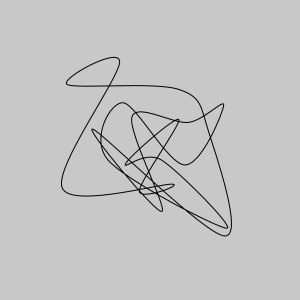

In [42]:
create_canvas(300, 300)
translate(center)
no_fill()
points = random(-100, 100, size=(20, 2))
curve(points)
show()

Note that the number of points is the number of rows, and the number of columns is 2, because we are working in 2d (two coordinates per point). If we write



In [27]:
points.size

40

We get the number of **total** elements in the array (2 times the number of points). If we write



In [28]:
len(points)

20

or equivalently, `points.shape[0]`, we actually get the number of points.



### Slicing and indexing arrays



One difficult to master but useful feature that applies to all Python sequences  is &ldquo;slicing&rdquo;. This allows accessing subsets of the elements of a list
with a very concise syntax. Slicing is done using a colon (`:`) inside the
square brackets, for example



In [62]:
x = np.linspace(0, 10, 5)
x[1:3]

array([2.5, 5. ])

gives us a **new list** with the elements of the original list going from index
`1` (included), up to the index `3` (not included). This is similar to how we
think of loops using `range`, e.g `range(10)` gives us numbers up to but not
including `10`.

We can also &ldquo;slice&rdquo; up to negative indices, for example:



In [50]:
x[0:-1]

array([0. , 2.5, 5. , 7.5])

Gives us the list up to, but not including, the last element. If we skip an
element on either side of the column, it means that we are taking a slice of the
list from the start (skipping the first number), or till the end (skipping the
last). E.g:



In [45]:
x[3:]

array([ 7.5, 10. ])

Skips the first 3 elements of the list, while:



In [46]:
x[:-2]

array([0. , 2.5, 5. ])

skips the last two. 

We can also flip the sequence by using the `::-1` slice:


In [63]:
x[::-1]

array([10. ,  7.5,  5. ,  2.5,  0. ])

While the examples above would apply to any Python sequence, with NumPy we can do more sophisticated things. E.g. take a 2d array:



In [64]:
x = np.zeros((5, 5))
x

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

If we want to access a single element we can do:



In [52]:
x[0,2]

0.0

this could be done with the the same syntax that would work with the &ldquo;list of lists&rdquo;:



In [53]:
x[0][2]

0.0

but the former is more concise and more frequently used. 

We then can also use
the slicing syntax in a similar way, say to get the last three columns of the
array we can do



In [ ]:
x[:,-3:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

where the `:` alone can be read as &ldquo;give me all the rows&rdquo;.
Now, what would you do to get only the first three rows?
Insert the code here:



## Slicing images 
To practice slicing it is useful to actually look at an image, which we will represent as a numpy array. We will load an image using py5canvas. Internally is represened as a [Pillow](https://pypi.org/project/Pillow/) library object. We then can convert the image to numpy for slicing and visualize it with yet another library: [Matplotlib](https://matplotlib.org), a package that allows us to create plots and to visualize images. Matplotlib is widely used by the scientific community for making graphs and visualizations. It is beyond the scope of this module to teach you how to use it as its syntax can be quite obscure, but we will use it to quickly visualize images.



Now let's load the image and visualize it. We will use Matplotlib for this using `import matplotlib.pyplot as plt`. Do not worry about the details for now, just keep in mind that you can visualize a numpy array as an image using `plt.imshow(your_image)`.

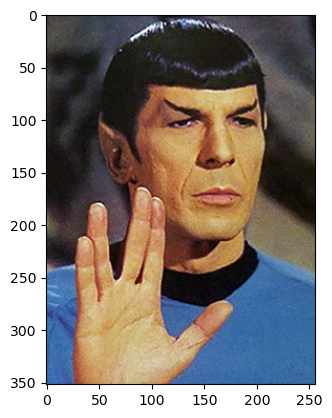

In [55]:
import matplotlib.pyplot as plt
img = np.array(load_image('spock.jpg'))
plt.imshow(img)

Now let's examine the shape of the image

In [56]:
img.shape

(352, 256, 3)

That is we have 256 rows (height), 256 columns (width) and 3 color channels (R, G, B). Let's slice this and see what happens. Experiment with the code

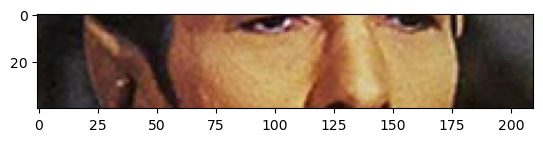

In [57]:
plt.imshow(img[100:140, 30:240, :])

Now let's look at a single channel

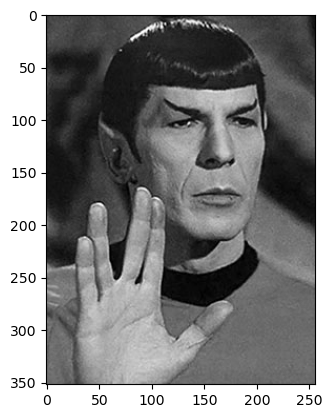

In [58]:
plt.imshow(img[:, :, 1], 'gray')

Now let's flip the image on the horizontal axis

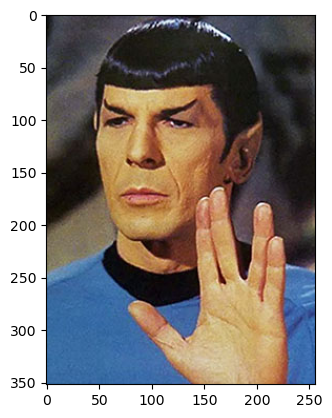

In [59]:
plt.imshow(img[:, ::-1, :])

Or the channels

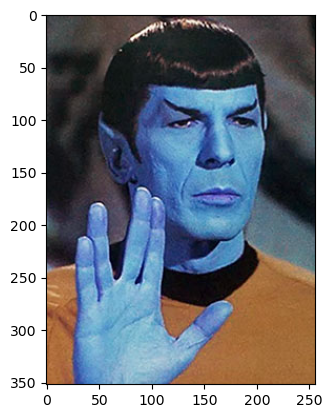

In [60]:
plt.imshow(img[:, :, ::-1])